<a href="https://colab.research.google.com/github/grandff/python-quant/blob/main/6%EA%B0%95_%EC%9D%B4%EB%8F%99%ED%8F%89%EA%B7%A0%EC%84%A0%2C_%EC%9D%B4%EB%8F%99%ED%8F%89%EA%B7%A0%EC%84%A0_%EB%8F%8C%ED%8C%8C_%EC%A0%84%EB%9E%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 나눔고딕 폰트 설치
# 셀 실행하고 런타임 다시시작 클릭
# 이후 셀 다시 실행하면 안됨
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,379 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155047 files and d

In [1]:
# data download
!wget "https://drive.google.com/uc?export=download&id=1VrrOVibE-oxdxY30SnfCDJ6Ghv38jXm1" -O "stock_data.zip"
!unzip stock_data.zip

# import lib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'NanumBarunGothic' # (Colab 용) 한글 출력을 위한 글꼴 설정
import numpy as np
import pandas as pd

# 일자별 주식 데이터 불러오기 (dict, for)
d = {}

# for문을 이용해서 데이터 읽기
  # adj_close : 주가
  # mc : 시가총액
  # sales : 매출액
  # op : 영업이익
  # ni : 순이익
  # liab : 부채
  # eq : 자본
for data_name in ['adj_close', 'mc', 'sales', 'op', 'ni', 'liab', 'eq'] :
  print(f"read csv {data_name} ... ")
  d[data_name] = pd.read_csv(f"./stock.{data_name}.csv", index_col=0, encoding="cp949", parse_dates=True)
  print(f"done! {d[data_name].shape}")
## result : 2278 개의 주식 데이터, 총 582일간 기록함

# 색인 데이터 로드 및 병합 (3강 코드 그대로)
itemname = pd.read_csv("stockinfo.itemname.csv", index_col=0, encoding='cp949')
sector = pd.read_csv("stockinfo.sector.csv", index_col=0, encoding='cp949')
stock_info = pd.concat([itemname, sector], axis=1)

--2021-10-13 04:04:39--  https://drive.google.com/uc?export=download&id=1VrrOVibE-oxdxY30SnfCDJ6Ghv38jXm1
Resolving drive.google.com (drive.google.com)... 172.217.204.113, 172.217.204.139, 172.217.204.138, ...
Connecting to drive.google.com (drive.google.com)|172.217.204.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-4g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/r6bceahnnk5o2e66aehmhabl117h153f/1634097825000/03135380322884973343/*/1VrrOVibE-oxdxY30SnfCDJ6Ghv38jXm1?e=download [following]
--2021-10-13 04:04:44--  https://doc-00-4g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/r6bceahnnk5o2e66aehmhabl117h153f/1634097825000/03135380322884973343/*/1VrrOVibE-oxdxY30SnfCDJ6Ghv38jXm1?e=download
Resolving doc-00-4g-docs.googleusercontent.com (doc-00-4g-docs.googleusercontent.com)... 172.217.193.132, 2607:f8b0:400c:c03::84
Connecting to doc-00-4g-docs.googleusercontent.com (d

In [2]:
# 주식 데이터 분석 및 EDA 수행
code = "A005930"  # 삼성전자
codename = stock_info.loc[code, 'itemname']
code, codename

('A005930', '삼성전자')

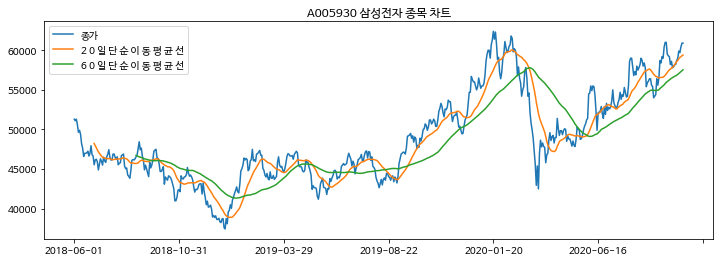

In [3]:
# 주가 이동평균선 그리기
  # rolling은 직전 n개에 대해 aggregation 준비
d['adj_close'].loc[code, :].plot(figsize=(12,4), label='종가')
d['adj_close'].loc[code, :].rolling(20).mean().plot(label = '2 0 일 단 순 이 동 평 균 선')
d['adj_close'].loc[code, :].rolling(60).mean().plot(label = '6 0 일 단 순 이 동 평 균 선')
plt.title(f"{code} {codename} 종목 차트")
plt.legend()

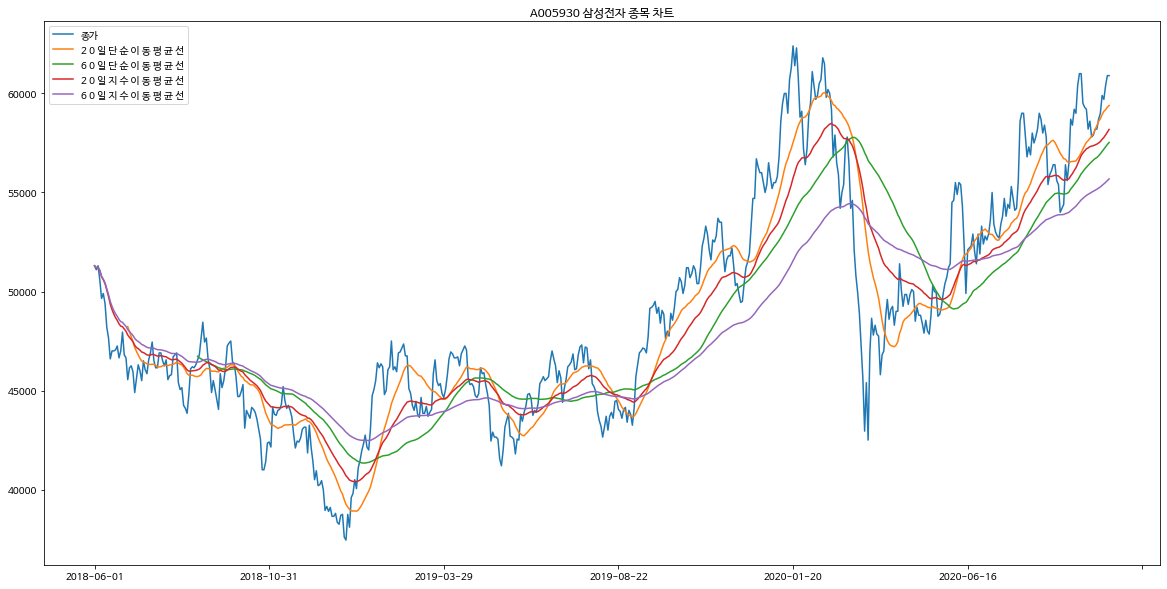

In [5]:
# 지수이동평균선 구하기
  # ewm 사용
d['adj_close'].loc[code, :].plot(figsize=(20,10), label='종가')
d['adj_close'].loc[code, :].rolling(20).mean().plot(label = '2 0 일 단 순 이 동 평 균 선')
d['adj_close'].loc[code, :].rolling(60).mean().plot(label = '6 0 일 단 순 이 동 평 균 선')
d['adj_close'].loc[code, :].ewm(20).mean().plot(label = '2 0 일 지 수 이 동 평 균 선')
d['adj_close'].loc[code, :].ewm(60).mean().plot(label = '6 0 일 지 수 이 동 평 균 선')
plt.title(f"{code} {codename} 종목 차트")
plt.legend()

In [6]:
# 차트 이동평균선 분석을 통해 투자할 경우 수익률 확인
# 20 일 이동평균선 딕셔너리에 할당
d['adj_close_sma20d'] = d['adj_close'].rolling(20, axis=1).mean()

In [8]:
# 시뮬레이션을 위한 날짜 변수와 날짜 인덱스 생성
date_list = d['adj_close'].columns
date_i = np.arange(len(date_list))

In [9]:
# 생성된 변수 확인
date_list[:5], date_i[:5]

(Index(['2018-06-01', '2018-06-04', '2018-06-05', '2018-06-07', '2018-06-08'], dtype='object'),
 array([0, 1, 2, 3, 4]))

In [11]:
# 시뮬레이션할 종목 선택
code = "A060250"  # NHN한국사이버결제
code_name = stock_info.loc[code, 'itemname']
code, code_name

('A060250', 'NHN한국사이버결제')

In [12]:
# 20 일 이동평균선 상향 돌파 신호 포착
len(date_i) # 582 일간 주가를 가지고 있음

582

In [14]:
print("20 일 이동평균선 상향돌파 Signal")
보유일 = 20
for i in date_i :
  # 첫날과 마지막날 20 일전 이후는 계산할 수 없으므로 제외
  if(i < 1 or i > len(dat략_list) - 보유일) :
    continue

  prev_date = date_list[i-1]  # 전날
  now_date = date_list[i]     # 당일
  
  직전_주가 = d['adj_close'].loc[code, prev_date]
  당일_주가 = d['adj_close'].loc[code, now_date]
  직전_이평선 = d['adj_close_sma20d'].loc[code, prev_date]
  당일_이평선 = d['adj_close_sma20d'].loc[code, now_date]

  # 20일 골든 크로스의 조건 ==> 어제는 이평선 밑, 오늘은 이평선 위
  if 직전_주가 < 직전_이평선 and 당일_주가 > 당일_이평선 :
    print(f" {now_date} signal 발생 ! ")

20 일 이동평균선 상향돌파 Signal
 2018-07-09 signal 발생 ! 
 2018-07-27 signal 발생 ! 
 2018-08-21 signal 발생 ! 
 2018-08-28 signal 발생 ! 
 2018-11-09 signal 발생 ! 
 2018-11-14 signal 발생 ! 
 2018-11-16 signal 발생 ! 
 2018-12-11 signal 발생 ! 
 2019-01-10 signal 발생 ! 
 2019-04-01 signal 발생 ! 
 2019-05-31 signal 발생 ! 
 2019-07-22 signal 발생 ! 
 2019-07-31 signal 발생 ! 
 2019-08-07 signal 발생 ! 
 2019-09-11 signal 발생 ! 
 2019-09-17 signal 발생 ! 
 2019-09-27 signal 발생 ! 
 2019-10-25 signal 발생 ! 
 2019-12-11 signal 발생 ! 
 2019-12-13 signal 발생 ! 
 2020-01-10 signal 발생 ! 
 2020-03-25 signal 발생 ! 
 2020-06-12 signal 발생 ! 
 2020-06-17 signal 발생 ! 
 2020-06-19 signal 발생 ! 
 2020-07-03 signal 발생 ! 


In [19]:
# 이동평균선 상향 돌파시 매수 후 20 일 후 매도 전략
print("20 일 이동평균선 상향돌파 Signal")
보유일 = 20

for i in date_i :
  # 첫날과 마지막날 20 일전 이후는 계산할 수 없으므로 제외
  if(i < 1 or i > len(date_list) - 보유일) :
    continue

  prev_date = date_list[i-1] # 전날
  now_date = date_list[i] # 당일

  직전_주가 = d['adj_close'].loc[code, prev_date]
  당일_주가 = d['adj_close'].loc[code, now_date]
  직전_이평선 = d['adj_close_sma20d'].loc[code, prev_date]
  당일_이평선 = d['adj_close_sma20d'].loc[code, now_date]

  # 20일 골든 크로스의 조건 ==> 어제는 이평선 밑, 오늘은 이평선 위
  if 직전_주가 < 직전_이평선 and 당일_주가 > 당일_이평선 :
    sell_date = date_list[i + 보유일]   # 이평선 상향 돌파 시 매수 후 20 일 지난 날이 매도일
    매도시_주가 = d['adj_close'].loc[code, sell_date]
    수익률 = (매도시_주가 / 당일_주가) * 100 - 100 
    print(f" {now_date} signal 발생 ! 수익률 : {수익률:.2f}% ")

20 일 이동평균선 상향돌파 Signal
 2018-07-09 signal 발생 ! 수익률 : 6.94% 
 2018-07-27 signal 발생 ! 수익률 : 0.00% 
 2018-08-21 signal 발생 ! 수익률 : -6.95% 
 2018-08-28 signal 발생 ! 수익률 : -9.59% 
 2018-11-09 signal 발생 ! 수익률 : 8.04% 
 2018-11-14 signal 발생 ! 수익률 : 14.55% 
 2018-11-16 signal 발생 ! 수익률 : 9.40% 
 2018-12-11 signal 발생 ! 수익률 : 2.58% 
 2019-01-10 signal 발생 ! 수익률 : 15.83% 
 2019-04-01 signal 발생 ! 수익률 : 15.42% 
 2019-05-31 signal 발생 ! 수익률 : 41.35% 
 2019-07-22 signal 발생 ! 수익률 : 16.58% 
 2019-07-31 signal 발생 ! 수익률 : 14.71% 
 2019-08-07 signal 발생 ! 수익률 : 13.82% 
 2019-09-11 signal 발생 ! 수익률 : -5.83% 
 2019-09-17 signal 발생 ! 수익률 : -12.35% 
 2019-09-27 signal 발생 ! 수익률 : 3.51% 
 2019-10-25 signal 발생 ! 수익률 : -5.34% 
 2019-12-11 signal 발생 ! 수익률 : 9.35% 
 2019-12-13 signal 발생 ! 수익률 : 9.66% 
 2020-01-10 signal 발생 ! 수익률 : 13.82% 
 2020-03-25 signal 발생 ! 수익률 : 34.24% 
 2020-06-12 signal 발생 ! 수익률 : 17.79% 
 2020-06-17 signal 발생 ! 수익률 : 13.04% 
 2020-06-19 signal 발생 ! 수익률 : 7.91% 
 2020-07-03 signal 발생 ! 수익률 : 20.78

In [21]:
# 수익 결과 저장하기

print("20 일 이동평균선 상향돌파 Signal")
보유일 = 20
signal_i_list = []
signal_date_list = []
signal_price_list = []
signal_return_list = []

for i in date_i :
  # 첫날과 마지막날 20 일전 이후는 계산할 수 없으므로 제외
  if(i < 1 or i > len(date_list) - 보유일) :
     continue

  prev_date = date_list[i-1] # 전날
  now_date = date_list[i] # 당일

  직전_주가 = d['adj_close'].loc[code, prev_date]
  당일_주가 = d['adj_close'].loc[code, now_date]
  직전_이평선 = d['adj_close_sma20d'].loc[code, prev_date]
  당일_이평선 = d['adj_close_sma20d'].loc[code, now_date]

  # 20일 골든 크로스의 조건 ==> 어제는 이평선 밑, 오늘은 이평선 위
  if 직전_주가 < 직전_이평선 and 당일_주가 > 당일_이평선 :
    sell_date = date_list[i + 보유일] # 이평선 상향 돌파 시 매수 후 20 일 지난 날이 매도일
    매도시_주가 = d['adj_close'].loc[code, sell_date]
    수익률 = (매도시_주가 / 당일_주가) * 100 - 100 
    signal_i_list.append(i)
    signal_date_list.append(now_date)
    signal_price_list.append(당일_주가)
    signal_return_list.append(수익률)

20 일 이동평균선 상향돌파 Signal


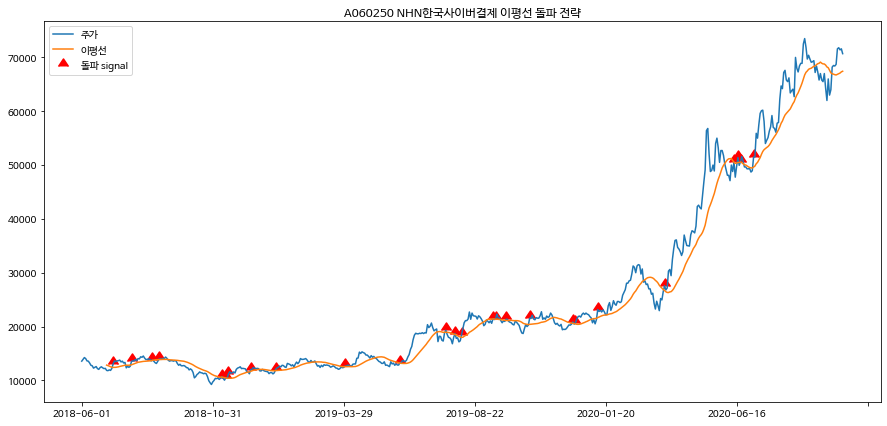

In [22]:
# 이동평균선 돌파 시뮬레이션 그래프 그려보기
d['adj_close'].loc[code, :].plot(figsize=(15,7), label='주가')
d['adj_close_sma20d'].loc[code, :].plot(label = '이평선')
plt.scatter(x=signal_i_list, y=signal_price_list, marker=10, color='red', s=100, label='돌파 signal')
plt.title(f"{code} {code_name} 이평선 돌파 전략")
plt.legend()

In [25]:
# 전체 매매 수익률 집계하기
수익률_합 = sum(signal_return_list)
평균_수익률 = 수익률_합 / len(signal_return_list)
단순_기간_수익률 = (d['adj_close'].loc[code][-1] / d['adj_close'].loc[code][0]) * 100 - 100

print(f" 수익률 합 : {수익률_합:.2f}%, 평균 수익률 : {평균_수익률:.2f}%, 단순 기간 수익률 : {단순_기간_수익률:.2f}% ")

 수익률 합 : 249.24%, 평균 수익률 : 9.59%, 단순 기간 수익률 : 421.08% 


In [28]:
# 셀트리온으로 다시 해보기
code = "A068270"
code_name = stock_info.loc[code, "itemname"]
date_list = d['adj_close'].columns
date_i = np.arange(len(date_list))
code, code_name, date_list, date_i

('A068270',
 '셀트리온',
 Index(['2018-06-01', '2018-06-04', '2018-06-05', '2018-06-07', '2018-06-08',
        '2018-06-11', '2018-06-12', '2018-06-14', '2018-06-15', '2018-06-18',
        ...
        '2020-09-25', '2020-09-28', '2020-09-29', '2020-10-05', '2020-10-06',
        '2020-10-07', '2020-10-08', '2020-10-12', '2020-10-13', '2020-10-14'],
       dtype='object', length=582),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 1

In [30]:
print("셀트리온 20 일 이동평균선 상향돌파 Signal")
보유일 = 20
signal_i_list = []      # 인덱스
signal_date_list = []   # 돌파 날짜 
signal_price_list = []  # 당일 종가 
signal_return_list = [] # 수익률 

for i in date_i :
  # 첫날과 마지막날 20 일 전 이후는 계산할 수 없으므로 제외
  if i < 1 or i > len(date_list) - 보유일 : 
    continue

  
  prev_date = date_list[i-1] # 전날
  now_date = date_list[i] # 당일


  직전_주가 = d['adj_close'].loc[code, prev_date]
  당일_주가 = d['adj_close'].loc[code, now_date]
  직전_이평선 = d['adj_close_sma20d'].loc[code, prev_date]
  당일_이평선 = d['adj_close_sma20d'].loc[code, now_date]

  # 20 일 골든크로스 확인
  if 직전_주가 < 직전_이평선 and 당일_주가 > 당일_이평선 : 
    sell_date = date_list[i + 보유일]
    매도시_주가 = d['adj_close'].loc[code, sell_date]
    수익률 = (매도시_주가 / 당일_주가) * 100 - 100
    print(f" {now_date} signal 발생!! ")
    
    signal_i_list.append(i)
    signal_date_list.append(now_date)
    signal_price_list.append(당일_주가)
    signal_return_list.append(수익률)
print("end")

셀트리온 20 일 이동평균선 상향돌파 Signal
 2018-07-16 signal 발생!! 
 2018-08-01 signal 발생!! 
 2018-08-09 signal 발생!! 
 2018-08-21 signal 발생!! 
 2018-09-04 signal 발생!! 
 2018-11-19 signal 발생!! 
 2018-11-26 signal 발생!! 
 2019-01-10 signal 발생!! 
 2019-01-28 signal 발생!! 
 2019-03-06 signal 발생!! 
 2019-03-12 signal 발생!! 
 2019-04-09 signal 발생!! 
 2019-06-03 signal 발생!! 
 2019-07-03 signal 발생!! 
 2019-07-05 signal 발생!! 
 2019-08-28 signal 발생!! 
 2019-10-01 signal 발생!! 
 2019-12-17 signal 발생!! 
 2020-02-10 signal 발생!! 
 2020-03-02 signal 발생!! 
 2020-03-05 signal 발생!! 
 2020-03-10 signal 발생!! 
 2020-03-23 signal 발생!! 
 2020-04-29 signal 발생!! 
 2020-05-12 signal 발생!! 
 2020-05-29 signal 발생!! 
 2020-08-10 signal 발생!! 
 2020-08-24 signal 발생!! 
 2020-08-26 signal 발생!! 
 2020-09-07 signal 발생!! 
end


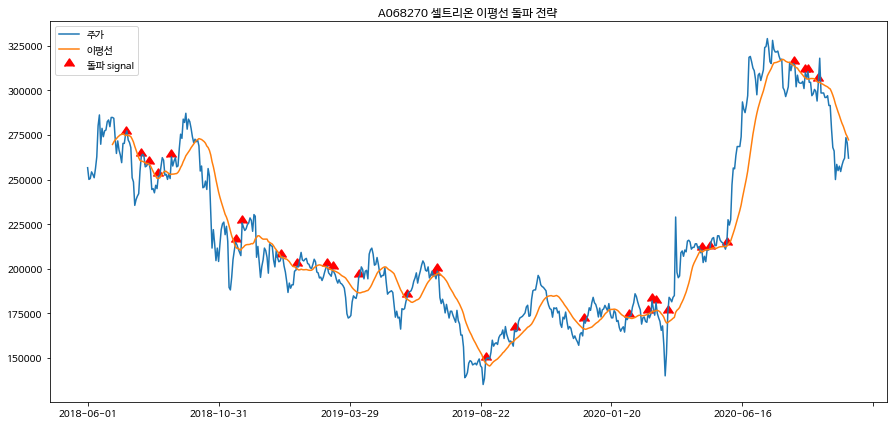

In [31]:
# 이동평균선 돌파 시뮬레이션, 그래프 그려보기
d['adj_close'].loc[code, :].plot(figsize=(15,7), label='주가')
d['adj_close_sma20d'].loc[code, :].plot(label='이평선')
plt.scatter(x=signal_i_list, y=signal_price_list, marker = 10, color='red', s=100, label='돌파 signal')
plt.title(f"{code} {code_name} 이평선 돌파 전략")
plt.legend()

In [32]:
# 전체 매매 수익률 집계하기

수익률_합 = sum(signal_return_list)

평균_수익률 = 수익률_합 / len(signal_return_list)

단순_기간_수익률 = (d['adj_close'].loc[code][-1] / d['adj_close'].loc[code][0]) * 100 - 100


print(f" 수익률 합 : {수익률_합:.2f}%, 평균 수익률 : {평균_수익률:.2f}%, 단순 기간 수익률 : {단순_기간_수익률:.2f}% ")

 수익률 합 : 52.95%, 평균 수익률 : 1.76%, 단순 기간 수익률 : 2.08% 
